## Wrangling Exercises

>## Acquire and Summarize:
### Exercise 1)
Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [1]:
import pandas as pd
import os
from env import get_db_url
import matplotlib as plt
import seaborn as sns
import numpy as np


sql = """SELECT
  *
FROM properties_2017
LEFT JOIN predictions_2017 AS pe USING (parcelid)
LEFT JOIN architecturalstyletype AS arch USING (architecturalstyletypeid)
LEFT JOIN propertylandusetype USING (propertylandusetypeid)
LEFT JOIN airconditioningtype USING (airconditioningtypeid)
LEFT JOIN typeconstructiontype USING (typeconstructiontypeid)
LEFT JOIN storytype USING (storytypeid)
LEFT JOIN unique_properties USING (parcelid)
LEFT JOIN heatingorsystemtype USING (heatingorsystemtypeid)
WHERE propertylandusetype.propertylandusedesc = 'Single Family Residential'
AND pe.transactiondate LIKE '2017%%';
    
    """

df = pd.read_sql(sql, get_db_url("zillow"));


### Exercise 2) 
Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

### Looking at the data...

In [2]:
df.columns

Index(['heatingorsystemtypeid', 'parcelid', 'storytypeid',
       'typeconstructiontypeid', 'airconditioningtypeid',
       'propertylandusetypeid', 'architecturalstyletypeid', 'id',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildingsqft17',

In [3]:
df.parcelid.value_counts()

11991059    3
11957553    2
12478591    2
12035592    2
12443331    2
           ..
11494547    1
10976762    1
12650619    1
12650850    1
12826780    1
Name: parcelid, Length: 52320, dtype: int64

In [4]:
df.shape

(52441, 68)

In [5]:
df.head(1).T

,0
heatingorsystemtypeid,NaN
parcelid,14297519
storytypeid,NaN
typeconstructiontypeid,NaN
airconditioningtypeid,NaN
...,...
propertylandusedesc,Single Family Residential
airconditioningdesc,None
typeconstructiondesc,None
storydesc,None


### Exercise 3)
Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is:
- an attribute name, 
- the first column is the number of rows with missing values for that attribute, 
- and the second column is percent of total rows that have missing values for that attribute. 

Run the function and document takeaways from this on how you want to handle missing values.

In [6]:
#taking a look at how many nulls there are in each column of this dataset:
df.isnull().sum()

heatingorsystemtypeid     18506
parcelid                      0
storytypeid               52394
typeconstructiontypeid    52365
airconditioningtypeid     38803
                          ...  
propertylandusedesc           0
airconditioningdesc       38803
typeconstructiondesc      52365
storydesc                 52394
heatingorsystemdesc       18506
Length: 68, dtype: int64

In [7]:
#turning dataset horizontally for easier reading and making a copy for a new df that will show nulls count and % of nulls
df_nulls = df.copy().T

In [8]:
df_nulls.head()

,0,1,2,3,4,5,6,7,8,9,...,52431,52432,52433,52434,52435,52436,52437,52438,52439,52440
heatingorsystemtypeid,NaN,NaN,NaN,2.0,2.0,NaN,2.0,2.0,NaN,NaN,...,2.0,7.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0
parcelid,14297519,17052889,14186244,12177905,12095076,12069064,12790562,11104527,13944538,17110996,...,11978003,11318911,12055795,12892446,10722691,12412492,11000655,17239384,12773139,12826780
storytypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
typeconstructiontypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioningtypeid,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,13.0,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN


In [9]:
#creating a column that counts all the nulls
df_nulls['num_rows_missing']= df_nulls.count(axis=1)

In [10]:
#creating a column that finds what % the nulls are based on dataset count
df_nulls['pct_rows_missing']= round(df_nulls.count(axis=1)* 100 / len(df_nulls))

In [11]:
df_nulls.head(10)

,0,1,2,3,4,5,6,7,8,9,...,52433,52434,52435,52436,52437,52438,52439,52440,num_rows_missing,pct_rows_missing
heatingorsystemtypeid,NaN,NaN,NaN,2.0,2.0,NaN,2.0,2.0,NaN,NaN,...,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,33935,49906.0
parcelid,14297519,17052889,14186244,12177905,12095076,12069064,12790562,11104527,13944538,17110996,...,12055795,12892446,10722691,12412492,11000655,17239384,12773139,12826780,52441,77121.0
storytypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,71.0
typeconstructiontypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76,113.0
airconditioningtypeid,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,13.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,13638,20057.0
propertylandusetypeid,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,...,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,52441,77121.0
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,104.0
id,1727539,1387261,11677,2288172,781532,870991,1246926,1639362,249412,43675,...,80446,1635173,1373391,2274245,673515,2968375,1843709,1187175,52441,77121.0
basementsqft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,71.0
bathroomcnt,3.5,1.0,2.0,3.0,3.0,1.0,3.0,3.0,2.5,2.5,...,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,52441,77121.0


In [12]:
#Creating the function that applies these two columns above:

def missing_values():
    #creating a column that counts all the nulls
    df_nulls['num_rows_missing']= df_nulls.count(axis=1)
    #creating a column that finds what % the nulls are based on dataset count
    df_nulls['pct_rows_missing']= round(df_nulls.count(axis=1)* 100 / len(df_nulls))
    
    return df_nulls

## Prepare:

### Exercise 1)
Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [13]:
#already brought in single family units
df.propertylandusedesc.unique()

array(['Single Family Residential'], dtype=object)

### Exercise 2) 
Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
    - hint:
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [14]:
#df.columns

In [15]:
#creating a function to remove unwanted columns (*may add/change later)

cols_to_remove = ['heatingorsystemtypeid','parcelid','storytypeid','typeconstructiontypeid','airconditioningtypeid','propertylandusetypeid','architecturalstyletypeid','id','buildingclasstypeid','buildingqualitytypeid','decktypeid','pooltypeid10','pooltypeid2','pooltypeid7','taxamount','taxdelinquencyflag','taxdelinquencyyear','id']

def remove_columns(df, cols_to_remove): 
    df = df.drop(columns=cols_to_remove)
    return df

df= remove_columns(df, cols_to_remove )
df.head()

,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,landtaxvaluedollarcnt,censustractandblock,logerror,transactiondate,architecturalstyledesc,propertylandusedesc,airconditioningdesc,typeconstructiondesc,storydesc,heatingorsystemdesc
0,NaN,3.5,4.0,3.5,NaN,3100.0,3100.0,None,None,NaN,...,537569.0,6.059063e+13,0.025595,2017-01-01,None,Single Family Residential,None,None,None,None
1,NaN,1.0,2.0,1.0,1465.0,1465.0,1465.0,None,None,1465.0,...,376000.0,6.111001e+13,0.055619,2017-01-01,None,Single Family Residential,None,None,None,None
2,NaN,2.0,3.0,2.0,NaN,1243.0,1243.0,None,None,NaN,...,479489.0,6.059022e+13,0.005383,2017-01-01,None,Single Family Residential,None,None,None,None
3,NaN,3.0,4.0,3.0,NaN,2376.0,2376.0,None,None,NaN,...,36225.0,6.037300e+13,-0.103410,2017-01-01,None,Single Family Residential,None,None,None,Central
4,NaN,3.0,4.0,3.0,NaN,2962.0,2962.0,None,None,NaN,...,496619.0,6.037461e+13,-0.001011,2017-01-01,None,Single Family Residential,Central,None,None,Central


In [ ]:
#creating a function to handle the missing values based on null %

def handle_missing_values(df, prop_required_column = .6, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

df = handle_missing_values(df)

In [19]:
df.head()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,censustractandblock,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc
0,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,6.059063e+13,0.025595,2017-01-01,Single Family Residential,None
1,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,6.111001e+13,0.055619,2017-01-01,Single Family Residential,None
2,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6.059022e+13,0.005383,2017-01-01,Single Family Residential,None
3,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,6.037300e+13,-0.103410,2017-01-01,Single Family Residential,Central
4,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,...,1950.0,276684.0,773303.0,2016.0,496619.0,6.037461e+13,-0.001011,2017-01-01,Single Family Residential,Central


# Mall Customers Exercises:

### Exercise 1):
Acquire data from the customers table in the mall_customers database.

In [21]:
sql = """SELECT * FROM customers;"""

df = pd.read_sql(sql, get_db_url("mall_customers"));

In [22]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exercise 2):
Summarize the data (include distributions and descriptive statistics).


In [23]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
df.value_counts()

customer_id  gender  age  annual_income  spending_score
1            Male    19   15             39                1
138          Male    32   73             73                1
128          Male    40   71             95                1
129          Male    59   71             11                1
130          Male    38   71             75                1
                                                          ..
70           Female  32   48             47                1
71           Male    70   49             55                1
72           Female  47   49             42                1
73           Female  60   50             49                1
200          Male    30   137            83                1
Length: 200, dtype: int64

In [27]:
df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


array([[<AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'annual_income'}>,
        <AxesSubplot:title={'center':'spending_score'}>]], dtype=object)

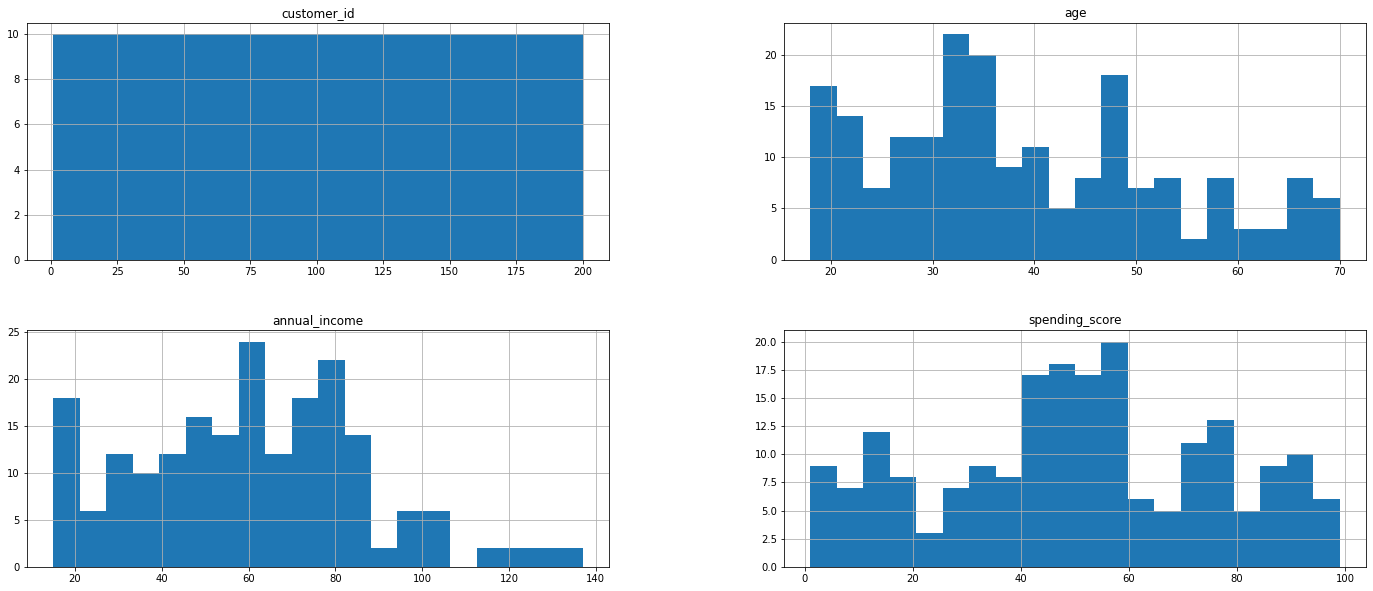

In [29]:
#looking at distribution
df.hist(figsize=(24, 10), bins=20)

### Exercise 3)
Detect outliers using IQR.

In [30]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

add_upper_outlier_columns(df, k=1.5)

df.head()


,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers
0,1,Male,19,15,39,0,0,0.0,0
1,2,Male,21,15,81,0,0,0.0,0
2,3,Female,20,16,6,0,0,0.0,0
3,4,Female,23,16,77,0,0,0.0,0
4,5,Female,31,17,40,0,0,0.0,0


In [31]:
#looking at the outliers in data:
outlier_cols = [col for col in df if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df[col][df[col] > 0]
    print(data.describe())


~~~
customer_id_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: customer_id_outliers, dtype: float64
~~~
age_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age_outliers, dtype: float64
~~~
annual_income_outliers
count    2.00
mean     4.25
std      0.00
min      4.25
25%      4.25
50%      4.25
75%      4.25
max      4.25
Name: annual_income_outliers, dtype: float64
~~~
spending_score_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: spending_score_outliers, dtype: float64


In [32]:
#TAKEAWAY: the only outliers found were in column Annual_income and 
#the outliers were above teh upper bound by 4.25

### Exercise 4)
Split data into train, validate, and test.

In [36]:
from sklearn.model_selection import train_test_split

def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on taxvaluedollarcnt.
    return train, validate, test DataFrames.
    '''


    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, validate, test

train, validate, test = split_data(df)

In [47]:
train.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers
123,124,Male,39,69,91,0,0,0.0,0
76,77,Female,45,54,53,0,0,0.0,0
171,172,Male,28,87,75,0,0,0.0,0
10,11,Male,67,19,14,0,0,0.0,0
35,36,Female,21,33,81,0,0,0.0,0


### Exercise 5)
Encode categorical columns using a one hot encoder (pd.get_dummies).

In [50]:
dummy_df = pd.get_dummies(train['gender'],dummy_na=False, drop_first = True)
#append to add encoded col to df
train = pd.concat([train, dummy_df], axis=1)

In [51]:
train.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers,Male
123,124,Male,39,69,91,0,0,0.0,0,1
76,77,Female,45,54,53,0,0,0.0,0,0
171,172,Male,28,87,75,0,0,0.0,0,1
10,11,Male,67,19,14,0,0,0.0,0,1
35,36,Female,21,33,81,0,0,0.0,0,0


### Exercise 6):
Handles missing values.

In [53]:
#no missing values
train.isnull().sum()

customer_id                0
gender                     0
age                        0
annual_income              0
spending_score             0
customer_id_outliers       0
age_outliers               0
annual_income_outliers     0
spending_score_outliers    0
Male                       0
dtype: int64

In [54]:
#dropping not needed columns
cols_to_remove = ['customer_id_outliers','age_outliers','annual_income_outliers','spending_score_outliers']
train.drop(columns=cols_to_remove)

,customer_id,gender,age,annual_income,spending_score,Male
123,124,Male,39,69,91,1
76,77,Female,45,54,53,0
171,172,Male,28,87,75,1
10,11,Male,67,19,14,1
35,36,Female,21,33,81,0
...,...,...,...,...,...,...
175,176,Female,30,88,86,0
101,102,Female,49,62,48,0
148,149,Female,34,78,22,0
99,100,Male,20,61,49,1


### Exercise 7)
Scaling

Text(0.5, 1.0, 'Scaled')

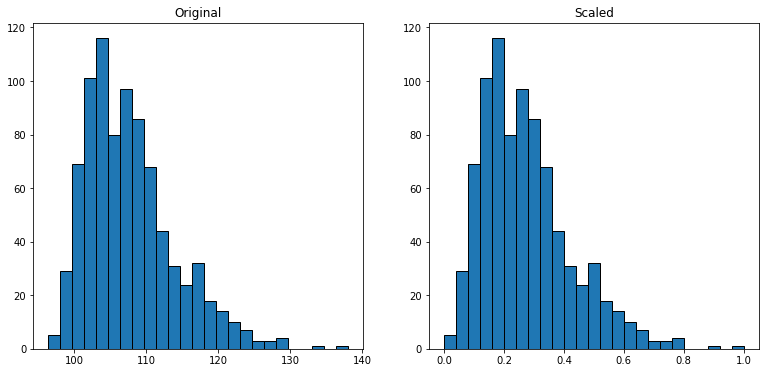

In [58]:
import sklearn.preprocessing
from scipy import stats
import matplotlib.pyplot as plt


x = stats.skewnorm(7).rvs(1500) * 10 + 100
x = x.reshape(-1, 1)
#I first again split, to have a set of data that is not scaled and one
#that is scaled:
x_train_and_validate, x_test = train_test_split(x, random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)

scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
